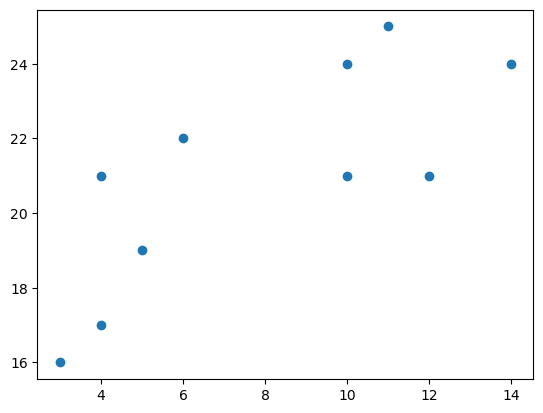

In [ ]:
import matplotlib.pyplot as plt

x = ["vieux", "manger", "ami", "gars", 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

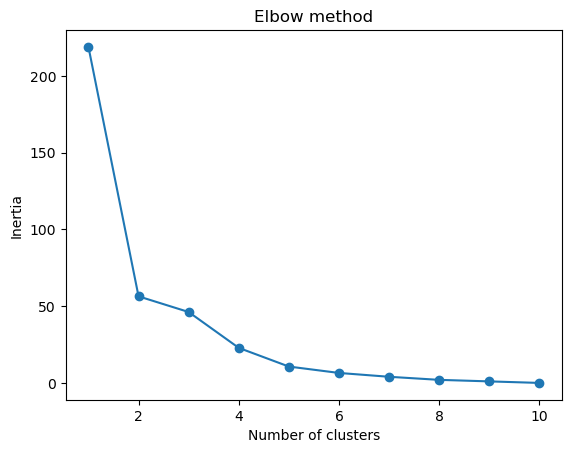

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#check the inertia of different values of K --> how many clusters

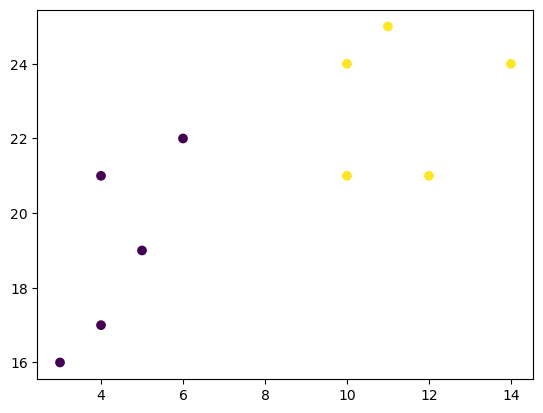

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

Top terms per cluster:
Cluster 0:
 world
 known
 sport
 like
 years
 land
 animals
 government
 international
 trade
Cluster 1:
 political
 liberal
 represent
 ideologies
 parties
 conservative
 century
 change
 21st
 significant
[[383 193 337 203 384 195  20 144 183 361 270 211 267 333 128 260 138 161
  207 298 326  48 287 185  76  72  24  27  62 197 157 351 251 259  39 111
   46   0 216 113 224  93 272 295 159 130 306 134 237 364 256 305 331  61
  247 366 158 160 217   6 334  45 117 315 352 163  57 231 372  33 303 174
  120 135 258 243 176 275 290 122 338 140 376  37  96 220  66  87 289 296
  312 110 205 194 238 141  64 358 145 353 382 131 133 103 165  86  79 346
   84 246 240 280 132 320 314 173  31  69 332 327 215 344  78  38  49 356
   11 281 368  95 101 172  74  85  81 250 374  56 292 143  16 283  99 129
  228 104 124 273  71  41  23 313 123 242   4  35 379 166 324 222 284 271
  274  82 102 139  94 309 318 206 171  52  42  18 184 342  80 257 343 126
  255 105 355  22 340 212 339 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

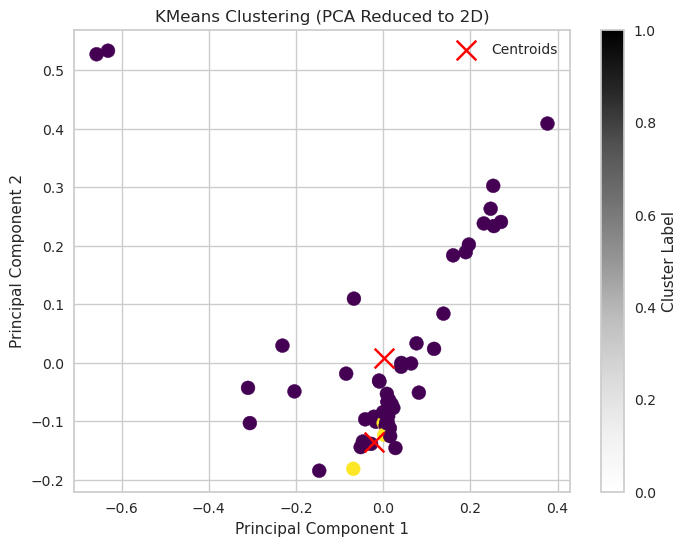

In [47]:
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = [
    # Sport
    "Football is the most popular sport in the world.",
    "Basketball players need to develop both their shooting and defensive skills.",
    "The Olympic Games take place every four years and feature athletes from all over the world.",
    "Serena Williams has won 23 Grand Slam singles titles, one of the greatest achievements in tennis history.",
    "The FIFA World Cup is one of the most watched sporting events globally.",
    "Formula 1 racing is a high-speed motorsport that requires both precision and endurance.",
    "Cricket is particularly popular in countries like India, Australia, and England.",
    "The Tour de France is one of the most prestigious cycling events, held annually in France.",
    "Soccer matches are typically 90 minutes long, split into two 45-minute halves.",
    "In rugby, teams score by grounding the ball in the opponent's try zone.",
    "American football is a physically demanding sport that involves both strategy and strength.",
    "The 100-meter sprint is often considered the ultimate test of a sprinter's speed.",
    "Tennis matches can be played on various surfaces, including grass, clay, and hard courts.",
    "Baseball is known for its rich history, with legendary players like Babe Ruth and Jackie Robinson.",
    "Volleyball is played both indoors and on the beach, with different rules for each.",
    "Golf is a sport that requires precision and patience, with players aiming for the lowest possible score.",
    "Boxing is a combat sport where two athletes fight with their fists in a controlled environment.",
    "The World Cup is held every four years, with teams from all over the globe competing for the title.",
    "Motorsports like MotoGP and IndyCar attract fans with high-speed races and intense rivalries.",

    # Animals
    "Lions are often called the 'kings of the jungle' because of their powerful build and majestic mane.",
    "Elephants are the largest land mammals and are known for their memory and social behaviors.",
    "Penguins are flightless birds that thrive in cold environments, particularly in Antarctica.",
    "Giraffes are the tallest land animals, known for their long necks which help them reach high tree branches.",
    "Dolphins are intelligent marine mammals known for their playful behavior and complex social structures.",
    "Koalas are marsupials that live in eucalyptus trees and are native to Australia.",
    "Cheetahs are the fastest land animals, capable of reaching speeds up to 60 miles per hour in short bursts.",
    "A group of owls is called a parliament, reflecting their wise and mysterious reputation.",
    "Tigers are solitary big cats, and each one has unique stripes on their fur.",
    "Polar bears are adapted to cold climates, with a thick layer of fat and dense fur to keep warm.",
    "Kangaroos are marsupials that are known for their strong hind legs and ability to leap great distances.",
    "Sloths are slow-moving animals that spend most of their time in trees, primarily in Central and South America.",
    "Sharks are apex predators in the ocean and have existed for over 400 million years.",
    "Whales are the largest animals on Earth, with some species growing up to 100 feet long.",
    "Bats are the only mammals capable of sustained flight, and many species help control insect populations.",
    "Hummingbirds are the smallest migratory birds and are known for their rapid wing beats.",
    "Owls have specialized feathers that allow them to fly silently, making them excellent hunters at night.",
    "Crocodiles are large reptiles that have existed for over 200 million years, known for their powerful bite.",
    "The cheetah is the fastest land animal, capable of reaching speeds up to 60 mph in short bursts.",

    # Politics
    "Democracy allows citizens to participate in governance through voting and representation.",
    "Climate change is one of the most significant political issues of the 21st century.",
    "The United Nations was established to promote peace and security among member nations.",
    "Economic inequality remains a pressing issue in many countries around the world.",
    "Human rights are fundamental to ensuring dignity and freedom for all people.",
    "International relations are shaped by diplomacy, trade, and conflict resolution.",
    "In a parliamentary system, the head of government is typically separate from the head of state.",
    "Political parties often represent different ideologies, from conservative to liberal.",
    "The U.S. Constitution outlines the structure of the government and protects individual freedoms.",
    "Election campaigns are often marked by debates, advertisements, and public speeches.",
    "Social justice movements advocate for equality and fair treatment of all people, especially marginalized groups.",
    "The World Health Organization (WHO) plays a key role in global health policy and initiatives.",
    "Economic policies shape the prosperity of a nation, influencing employment rates, inflation, and GDP growth.",
    "Globalization has increased international trade, but it also presents challenges to local economies.",
    "International trade agreements, like NAFTA or the EU, have far-reaching impacts on global commerce.",
    "The separation of powers ensures that no single branch of government becomes too powerful in a democratic system.",
    "Terrorism is a global security issue that governments around the world are working to combat.",
    "Political campaigns often use social media to reach large audiences and engage voters directly.",
    "Civil rights movements, like the U.S. Civil Rights Movement, have sought to end discrimination and segregation."
]
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print(order_centroids)
print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample documents





# Dimensionality Reduction with PCA to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())  # Converting sparse matrix to dense array

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of points in 2D space, colored by cluster
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=model.labels_, cmap='viridis', marker='o', s=100)

# Plotting the cluster centers
centers = pca.transform(model.cluster_centers_)  # Transform the cluster centers to 2D space
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')

# Adding labels and title
plt.title("KMeans Clustering (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')

# Show the plot
plt.legend()
plt.show()


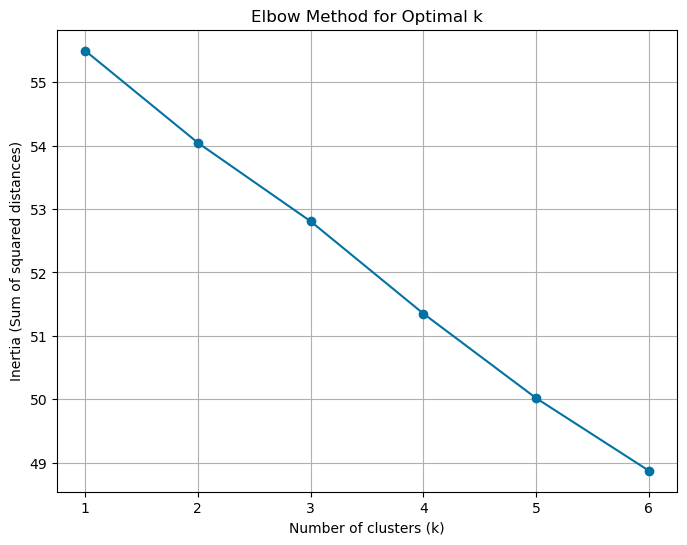

In [48]:
inertia_values = []
from matplotlib import rcParams

# Reset the rcParams to default settings
plt.rcdefaults()
# Try different values of k (number of clusters)
k_range = range(1, 7)  # Trying k from 1 to 10


for k in k_range:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
    model.fit(X)
    inertia_values.append(model.inertia_)
# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()
#check the inertia of different values of K --> how many clusters

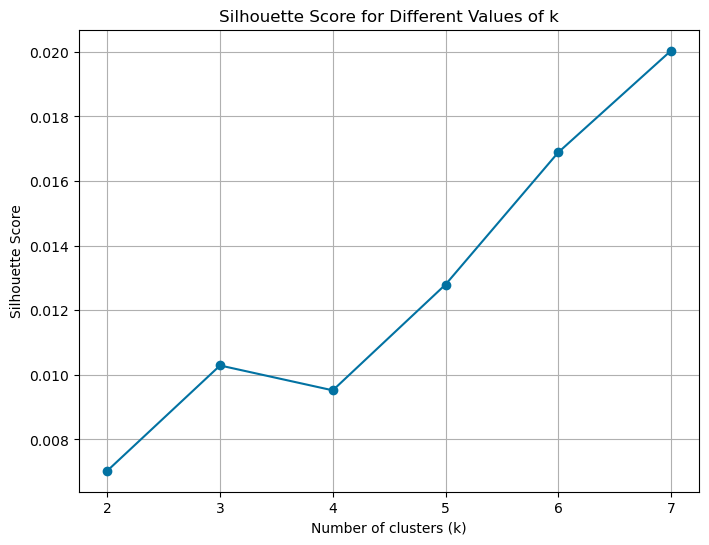

In [49]:
from sklearn.metrics import silhouette_score

max_k = min(len(documents), 7)  # Maximum number of clusters = min(number of samples, 8)
silhouette_scores = []
# Try KMeans for different values of k from 2 to max_k (because silhouette score requires at least 2 clusters)
k_range = range(2, max_k + 1)
for k in k_range:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
    model.fit(X)
    
    # Compute the silhouette score for the current clustering
    score = silhouette_score(X, model.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

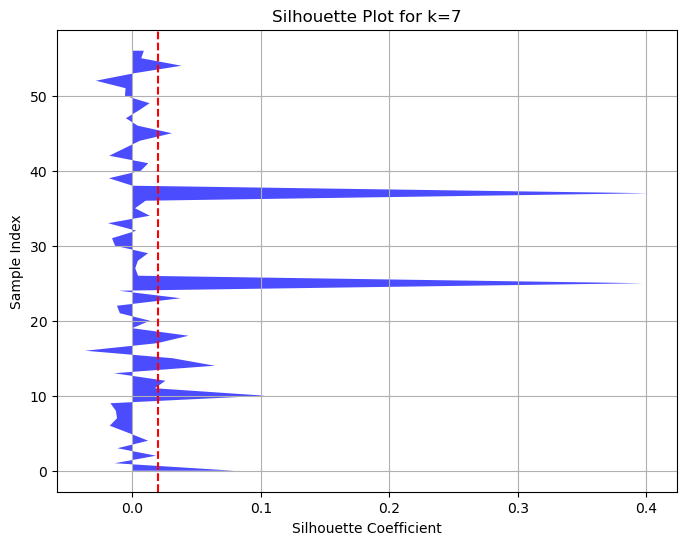

In [50]:
import numpy as np
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, model.labels_)
    
    # Create a silhouette plot for the current k
plt.figure(figsize=(8, 6))
    
    # Silhouette plot
plt.fill_betweenx(np.arange(len(silhouette_vals)), 0, silhouette_vals, facecolor='blue', alpha=0.7)
plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')  # Average silhouette score
plt.title(f'Silhouette Plot for k={k}')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Sample Index')
plt.grid(True)
    
    # Show the plot
plt.show()

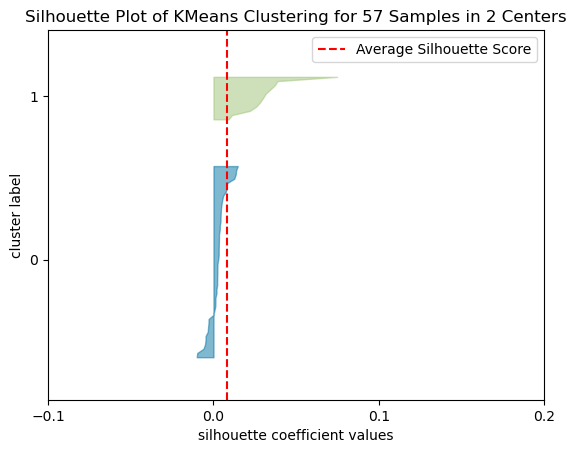

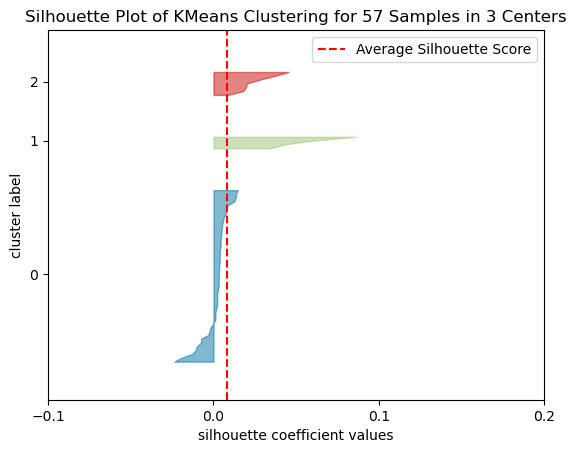

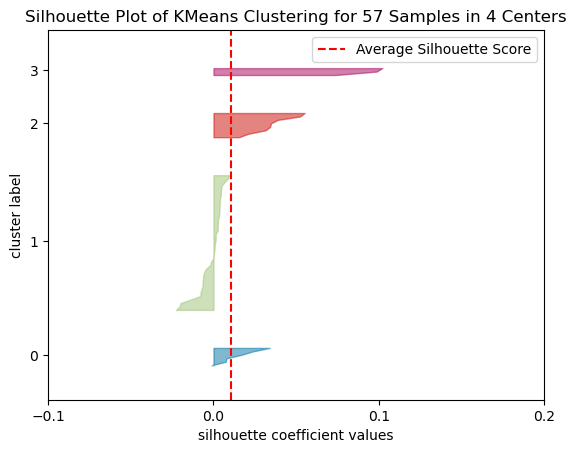

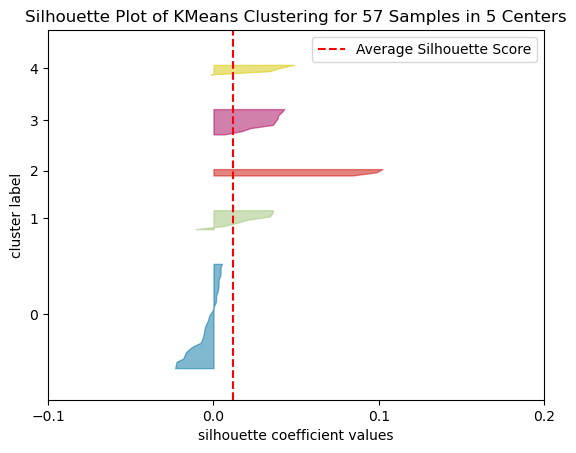

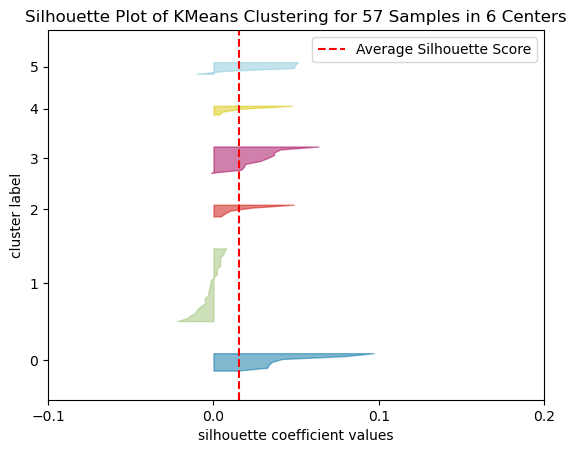

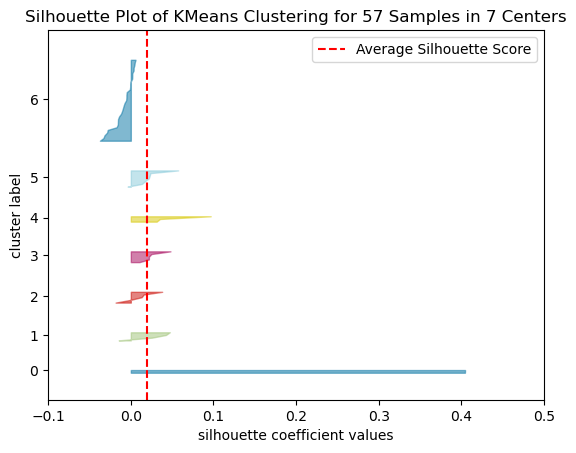

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer #pip install
max_k = min(len(documents) - 1, 7)  # Maximum k is n_samples - 1 (7 for 8 documents)
k_range = range(2, max_k + 1)

# Plotting silhouette visualizations for different values of k
for k in k_range:
    # Fit KMeans with the current value of k
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)  # Fit the model
    visualizer.show()  # Show the silhouette plot